# **Step 1: Load All Datasets**
**Purpose**: In this step, we load the four datasets into separate Pandas DataFrames. This allows us to independently analyze and manipulate each dataset. By displaying the first few rows, we verify that the data has been loaded correctly and that we can view the structure of each dataset.

In [14]:
import pandas as pd

# Load the four datasets
df1 = pd.read_csv('csv_result_KC3.csv')
df2 = pd.read_csv('csv_result_MW1.csv')
df3 = pd.read_csv('csv_result_MC2.csv')
df4 = pd.read_csv('csv_result_PC1.csv')

# Displaying first few rows of each dataset
print("Dataset 1:")
print(df1.head())

print("\nDataset 2:")
print(df2.head())

print("\nDataset 3:")
print(df3.head())

print("\nDataset 4:")
print(df4.head())

Dataset 1:
   id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  \
0   1          0             1           1                     0   
1   2          0             1           5                     0   
2   3         22            43          20                     3   
3   4          2            11          10                     0   
4   5          0             7           2                     0   

   LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0             0                0                      1                0.33   
1             1                0                      1                0.20   
2            11               38                     26                0.20   
3             1               12                      7                0.20   
4             0                4                      5                0.22   

   DECISION_COUNT  ... NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
0               0  ...           

# **Step 2: Check Data Quality for Each Dataset**
**Purpose** : We check the structure of each dataset using info(). This step gives us an understanding of the number of columns, data types, and any missing values in each dataset. It's essential to know what data we're working with and whether any columns need special attention (e.g., missing or improperly formatted values).

In [15]:
# Check dataset information for each dataset
print("Dataset 1 Information:")
df1.info()

print("\nDataset 2 Information:")
df2.info()

print("\nDataset 3 Information:")
df3.info()

print("\nDataset 4 Information:")
df4.info()

Dataset 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               458 non-null    int64  
 1   LOC_BLANK                        458 non-null    int64  
 2   BRANCH_COUNT                     458 non-null    int64  
 3   CALL_PAIRS                       458 non-null    int64  
 4   LOC_CODE_AND_COMMENT             458 non-null    int64  
 5   LOC_COMMENTS                     458 non-null    int64  
 6   CONDITION_COUNT                  458 non-null    int64  
 7   CYCLOMATIC_COMPLEXITY            458 non-null    int64  
 8   CYCLOMATIC_DENSITY               458 non-null    float64
 9   DECISION_COUNT                   458 non-null    int64  
 10  DECISION_DENSITY                 458 non-null    object 
 11  DESIGN_COMPLEXITY                458 non-null    int64  
 12 

# **Step 3: Check for Missing Values**
**Purpose** : This step identifies any missing values in the datasets. Missing values can lead to erroneous results, so it's important to determine how many missing entries are present in each column of each dataset before proceeding with further analysis.

In [16]:
# Check for missing values in each dataset
print("Missing values in Dataset 1:")
print(df1.isnull().sum())

print("\nMissing values in Dataset 2:")
print(df2.isnull().sum())

print("\nMissing values in Dataset 3:")
print(df3.isnull().sum())

print("\nMissing values in Dataset 4:")
print(df4.isnull().sum())

Missing values in Dataset 1:
id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
GLOBAL_DATA_COMPLEXITY             0
GLOBAL_DATA_DENSITY                0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_

# **Step 4: Handle Missing Values**
Purpose: After identifying missing values, we handle them by filling in the missing values with the mean of the respective column. This is a standard approach to dealing with missing data, ensuring that we don't lose valuable data rows while avoiding introducing bias.

In [17]:
import re
# Function to clean non-numeric characters from a string
def clean_non_numeric(data):
    if isinstance(data, str):
        return pd.to_numeric(re.sub(r'[^0-9.]', '', data), errors='coerce')
    return pd.to_numeric(data, errors='coerce')

# Apply the cleaning function to all columns in the DataFrame
df1 = df1.map(clean_non_numeric)
df2 = df2.map(clean_non_numeric)
df3 = df3.map(clean_non_numeric)
df4 = df4.map(clean_non_numeric)


# Fill missing values with the mean for each dataset
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)
df3.fillna(df3.mean(), inplace=True)
df4.fillna(df4.mean(), inplace=True)

# Verify missing values have been filled
print("Missing values after handling in Dataset 1:")
print(df1.isnull().sum())
print("Missing values after handling in Dataset 2:")
print(df2.isnull().sum())
print("Missing values after handling in Dataset 3:")
print(df3.isnull().sum())
print("Missing values after handling in Dataset 4:")
print(df4.isnull().sum())

Missing values after handling in Dataset 1:
id                                   0
LOC_BLANK                            0
BRANCH_COUNT                         0
CALL_PAIRS                           0
LOC_CODE_AND_COMMENT                 0
LOC_COMMENTS                         0
CONDITION_COUNT                      0
CYCLOMATIC_COMPLEXITY                0
CYCLOMATIC_DENSITY                   0
DECISION_COUNT                       0
DECISION_DENSITY                     0
DESIGN_COMPLEXITY                    0
DESIGN_DENSITY                       0
EDGE_COUNT                           0
ESSENTIAL_COMPLEXITY                 0
ESSENTIAL_DENSITY                    0
LOC_EXECUTABLE                       0
PARAMETER_COUNT                      0
GLOBAL_DATA_COMPLEXITY               0
GLOBAL_DATA_DENSITY                  0
HALSTEAD_CONTENT                     0
HALSTEAD_DIFFICULTY                  0
HALSTEAD_EFFORT                      0
HALSTEAD_ERROR_EST                   0
HALSTEAD_LENGTH     

In [18]:
# # Function to clean non-numeric characters from a string
# def clean_non_numeric(data):
#     if isinstance(data, str):
#         return pd.to_numeric(data.replace(r'[^0-9.]', '', regex=True), errors='coerce')
#     return data
# 
# # Apply the cleaning function to all columns in the DataFrame
# df1 = df1.apply(lambda col: col.map(clean_non_numeric))
# df2 = df2.apply(lambda col: col.map(clean_non_numeric))
# df3 = df3.apply(lambda col: col.map(clean_non_numeric))
# df4 = df4.apply(lambda col: col.map(clean_non_numeric))

# **Step 5: Check for Dataset Imbalance**
Purpose: In this step, we check the distribution of the target variable in each dataset to see if there’s an imbalance. An imbalanced dataset (e.g., where one class is much larger than others) can affect model performance, so it’s important to know if our datasets are balanced or not.


Visualizing attributes in Dataset 1


/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

ValueError: min() arg is an empty sequence

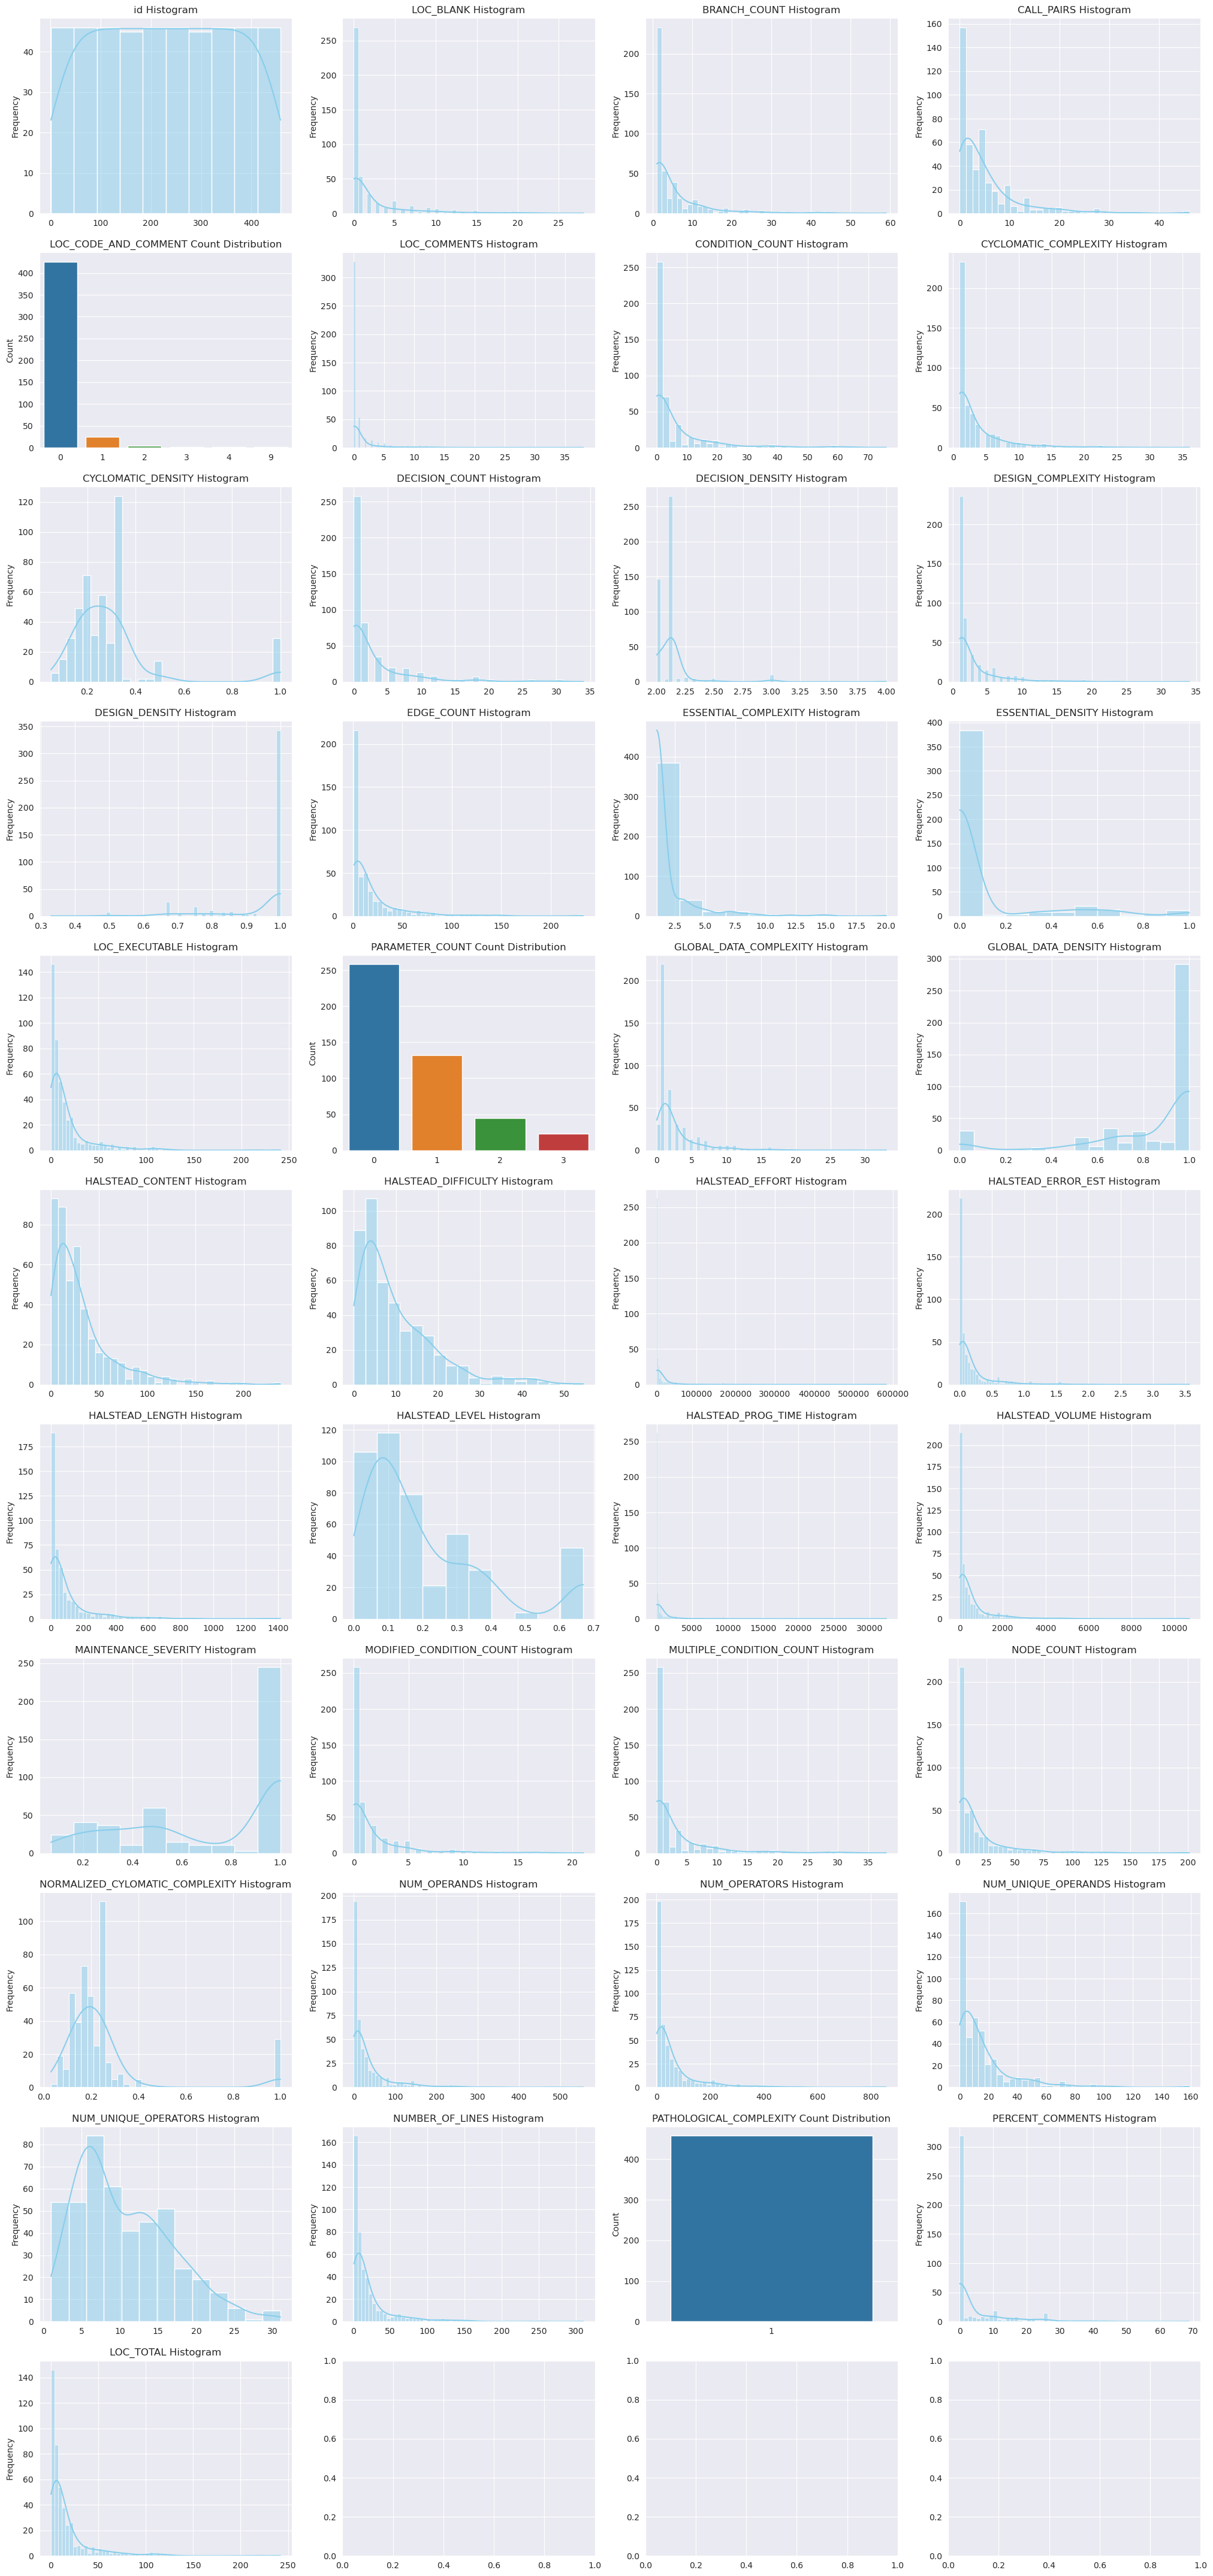

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to check and visualize the distribution of all attributes in the dataset
def check_and_visualize_all_attributes(df, dataset_num, axarr):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4

    for i, column in enumerate(df.columns):
        ax = axarr[i // 4, i % 4]
        if df[column].dtype == 'object' or df[column].nunique() < 10:
            sns.countplot(x=column, data=df, ax=ax)
            ax.set_title(f'{column} Count Distribution')
            ax.set_xlabel('')
            ax.set_ylabel('Count')
        else:
            sns.histplot(df[column], kde=True, color='skyblue', ax=ax)
            ax.set_title(f'{column} Histogram')
            ax.set_xlabel('')
            ax.set_ylabel('Frequency')

    for j in range(num_cols, axarr.size):
        axarr[j // 4, j % 4].axis('off')

# Check and visualize all attributes for each dataset
for i, df in enumerate([df1, df2, df3, df4], start=1):
    print(f"\nVisualizing attributes in Dataset {i}")

    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4
    fig, axarr = plt.subplots(num_rows, 4, figsize=(25, 5 * num_rows), squeeze=False)

    check_and_visualize_all_attributes(df, i, axarr)
    plt.tight_layout()
    plt.show()

# **Step 6: Generate Descriptive Statistics for Each Dataset**
Purpose: Generating descriptive statistics helps us understand the basic statistical properties of the dataset, such as the mean, median, standard deviation, and percentiles. This gives us insights into the central tendencies and the spread of the data.

In [ ]:
# Generate descriptive statistics for each dataset
print("\nDescriptive Statistics for Dataset 1:")
print(df1.describe())

print("\nDescriptive Statistics for Dataset 2:")
print(df2.describe())

print("\nDescriptive Statistics for Dataset 3:")
print(df3.describe())

print("\nDescriptive Statistics for Dataset 4:")
print(df4.describe())

# **Step 7: Visualize Outliers Using Boxplots**
Purpose: Boxplots are useful for visually identifying outliers. Outliers are extreme values that can distort statistical analyses, so it’s crucial to detect and manage them. This step creates boxplots for each dataset, allowing us to see any values that are significantly higher or lower than the rest of the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for all datasets
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boxplots of Datasets', fontsize=16)

# Plot boxplot for Dataset 1
sns.boxplot(data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Dataset 1 Boxplot')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 2
sns.boxplot(data=df2, ax=axs[0, 1])
axs[0, 1].set_title('Dataset 2 Boxplot')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 3
sns.boxplot(data=df3, ax=axs[1, 0])
axs[1, 0].set_title('Dataset 3 Boxplot')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 4
sns.boxplot(data=df4, ax=axs[1, 1])
axs[1, 1].set_title('Dataset 4 Boxplot')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

# **Step 8: Remove Outliers Using the IQR Method**
Purpose: Outliers are removed using the Interquartile Range (IQR) method. This method identifies and excludes values that lie outside the range of typical data points (beyond 1.5 times the IQR). Removing outliers can improve the accuracy of our models and prevent skewed analyses.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare subplots for comparison
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Iterate over datasets to remove outliers and plot results
for i, df in enumerate([df1, df2, df3, df4], start=1):
    # Before removing outliers
    sns.boxplot(data=df, ax=axs[i-1, 0])
    axs[i-1, 0].set_title(f'Dataset {i} - Before Outlier Removal')
    axs[i-1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Calculate IQR and remove outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # After removing outliers
    sns.boxplot(data=df_cleaned, ax=axs[i-1, 1])
    axs[i-1, 1].set_title(f'Dataset {i} - After Outlier Removal')
    axs[i-1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# **Step 9: Identify the Distribution Pattern of Data**
Purpose: In this step, we calculate the mean, median, and percentiles (Q1 and Q3) for each dataset. This helps us understand the distribution pattern of the data, such as whether it's normally distributed, skewed, or has a high level of variance. Understanding the data distribution is crucial for model selection and performance.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Iterate over datasets to calculate and plot mean, median, and percentiles
for i, df in enumerate([df1, df2, df3, df4], start=1):
    mean = df.mean()
    median = df.median()
    percentile_25 = df.quantile(0.25)
    percentile_75 = df.quantile(0.75)

    # Create a DataFrame for the statistics to plot
    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        '25th Percentile (Q1)': percentile_25,
        '75th Percentile (Q3)': percentile_75
    })

    # Plot the statistics for the current dataset
    plt.figure(figsize=(10, 6))
    stats_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Dataset {i} - Mean, Median, and Percentiles')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Step 10: Calculate Trimmed Mean**
Purpose: The trimmed mean is calculated by excluding a certain percentage of extreme values from both ends of the data. This is useful when we want a measure of central tendency that is not affected by outliers. The trimmed mean provides a more robust estimate of the true center of the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import trim_mean

# Trimming fraction (10%)
trim_fraction = 0.1

# Iterate over datasets to calculate trimmed mean and other statistics, and plot them
for i, df in enumerate([df1, df2, df3, df4], start=1):
    # Calculate statistics
    mean = df.mean()
    median = df.median()
    percentile_25 = df.quantile(0.25)
    percentile_75 = df.quantile(0.75)

    # Calculate trimmed mean
    trimmed_mean = trim_mean(df, proportiontocut=trim_fraction)

    # Create a DataFrame for the statistics to plot
    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Trimmed Mean': trimmed_mean,
        '25th Percentile (Q1)': percentile_25,
        '75th Percentile (Q3)': percentile_75
    })

    # Plot the statistics for the current dataset
    plt.figure(figsize=(10, 6))
    stats_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Dataset {i} - Mean, Trimmed Mean, Median, and Percentiles')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Step 11: Correlation Analysis**
Purpose: In this step, we perform correlation analysis to identify relationships between variables. A correlation matrix is created to show how strongly different variables are related to each other. This helps in understanding which features are most important and which ones are redundant.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix heatmap for each dataset
for i, df in enumerate([df1, df2, df3, df4], start=1):
    plt.figure(figsize=(10, 8))

    # Generate a correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Dataset {i} Correlation Matrix')

    # Show the heatmap
    plt.tight_layout()
    plt.show()